In [4]:
# Reading the dataset saved from kaggle
import pandas as pd

d1=pd.read_csv(r"student_por.csv", sep = ";")
d2=pd.read_csv(r"student_mat.csv", sep = ";")

In [6]:
# merging the data, 
students= d1.merge(d2, how='outer', on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health'])
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences_x,G1_x,G2_x,G3_x,absences_y,G1_y,G2_y,G3_y
0,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,1,4.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN
1,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,1,NaN,NaN,NaN,NaN,2.0,7.0,10.0,10.0
2,GP,F,15,R,GT3,T,1,1,other,other,...,1,1,2.0,8.0,9.0,9.0,NaN,NaN,NaN,NaN
3,GP,F,15,R,GT3,T,1,1,other,other,...,4,5,2.0,13.0,11.0,11.0,NaN,NaN,NaN,NaN
4,GP,F,15,R,GT3,T,1,1,other,other,...,4,5,NaN,NaN,NaN,NaN,2.0,8.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,MS,M,19,U,GT3,T,3,2,at_home,services,...,1,3,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN
878,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,5,NaN,NaN,NaN,NaN,5.0,8.0,9.0,9.0
879,MS,M,20,R,GT3,T,1,1,other,other,...,4,4,12.0,8.0,11.0,10.0,NaN,NaN,NaN,NaN
880,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,NaN,NaN,NaN,NaN,11.0,9.0,9.0,9.0


In [3]:
#cleaning the data

students= students.fillna(0)
students.drop(["nursery"],axis=1,inplace=True)
students.rename(columns={'absences_x': 'absences_p', 'G1_x': 'g1_p','G2_x':'g2_p','G3_x':'g3_p','absences_y': 'absences_m', 'G1_y': 'g1_m','G2_y':'g2_m','G3_y':'g3_m'}, inplace=True)

In [4]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences_p', 'g1_p', 'g2_p', 'g3_p', 'absences_m', 'g1_m',
       'g2_m', 'g3_m'],
      dtype='object')

In [5]:
#checking for student age values:
students["age"].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

In [299]:
# exporting the data into a csv file to create a database in MySQL
data.to_csv("student_data.csv", index= False)

In [6]:
d4=pd.read_csv("students_in_relation.csv")
d4

,school_name,sex,num_students_in_relationships
0,GP,F,135
1,GP,M,82
2,MS,F,76
3,MS,M,31


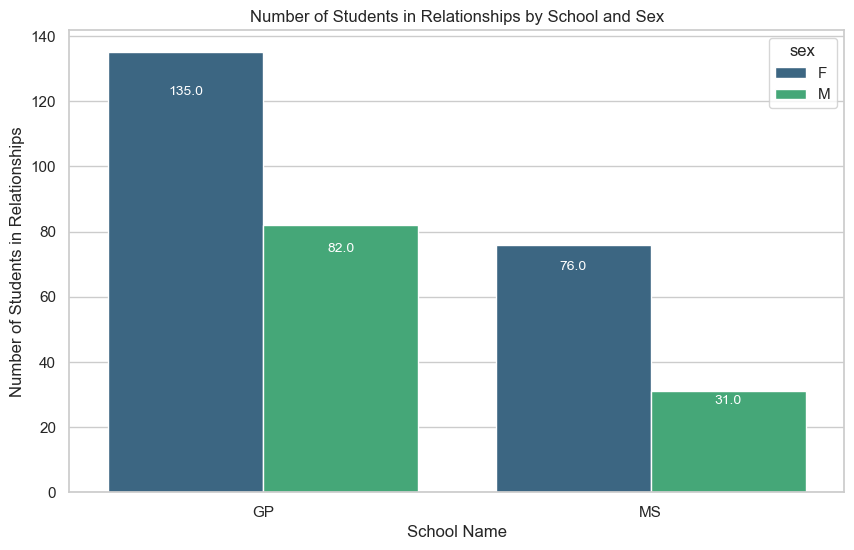

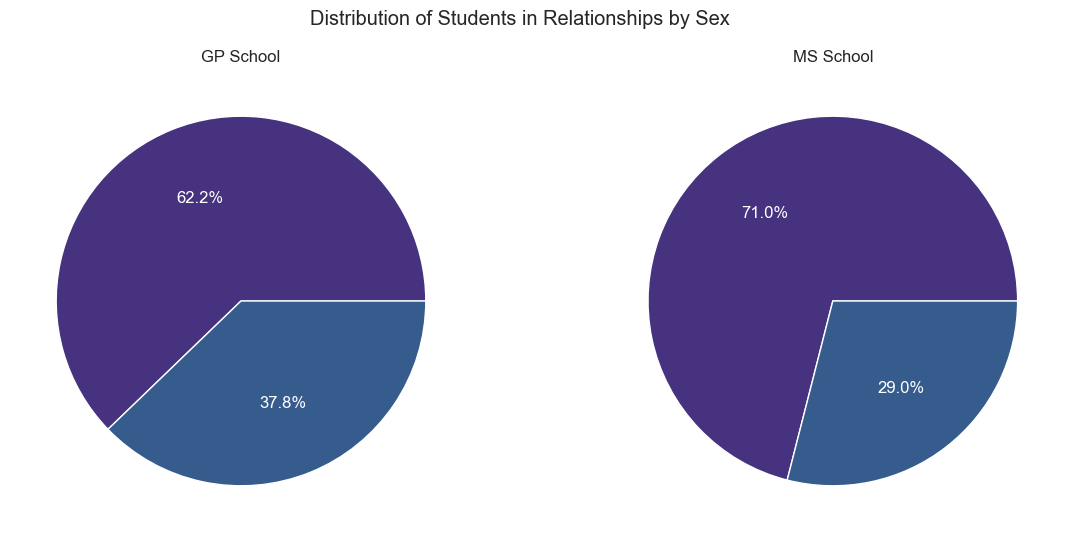

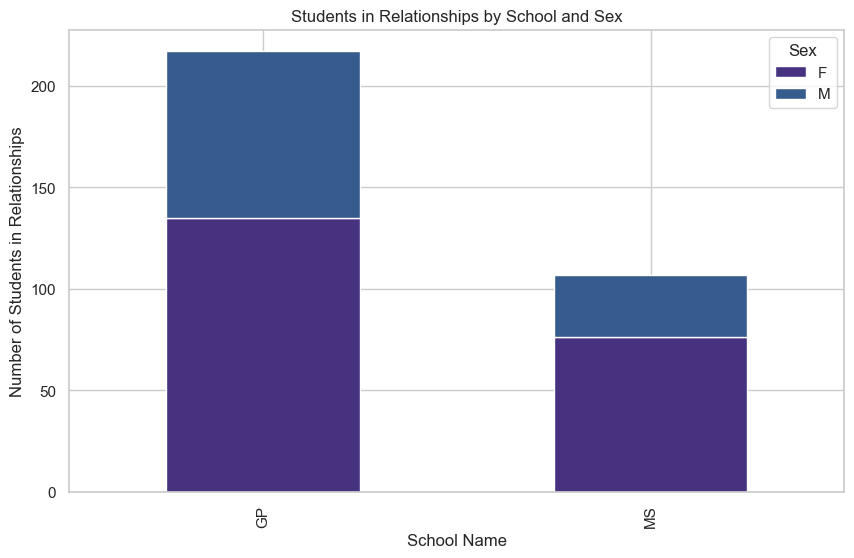

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"students_in_relation.csv")


# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=sns.barplot(x="school_name", y="num_students_in_relationships", hue="sex", data=df, palette="viridis")

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.1, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)

# Add titles and labels
plt.title('Number of Students in Relationships by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Number of Students in Relationships')

# Show the plot
plt.show()

#  Pie chart for each school showing the distribution of students in relationships by sex
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Students in Relationships by Sex')

# GP school
df_gp = df[df['school_name'] == 'GP']
axes[0].pie(df_gp['num_students_in_relationships'], labels=df_gp['sex'], autopct='%1.1f%%', colors=sns.color_palette("viridis"),textprops=dict(color="white"))
axes[0].set_title('GP School')

# MS school
df_ms = df[df['school_name'] == 'MS']
axes[1].pie(df_ms['num_students_in_relationships'], labels=df_ms['sex'], autopct='%1.1f%%', colors=sns.color_palette("viridis"),textprops=dict(color="white"))
axes[1].set_title('MS School')

plt.show()

#  Stacked bar plot for each school showing the number of students in relationships by sex
df_pivot = df.pivot(index='school_name', columns='sex', values='num_students_in_relationships')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("viridis"))
plt.title('Students in Relationships by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Number of Students in Relationships')
plt.legend(title='Sex')
plt.show()


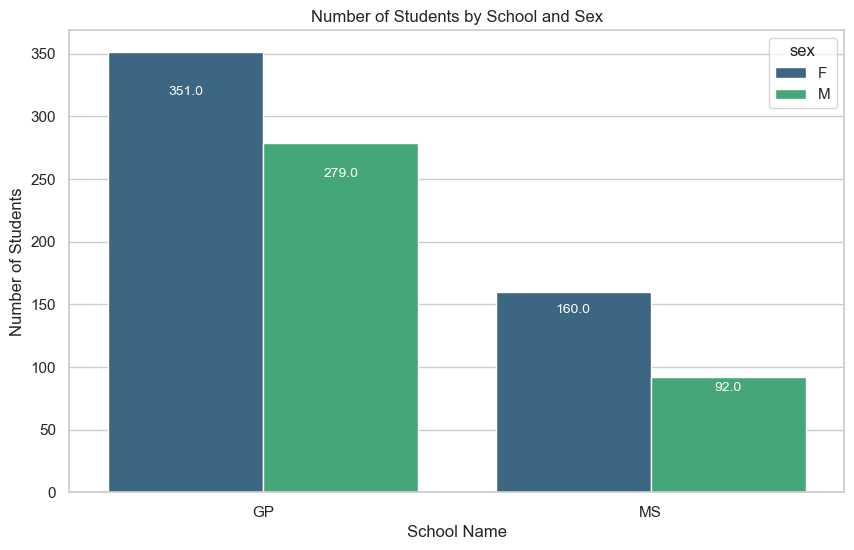

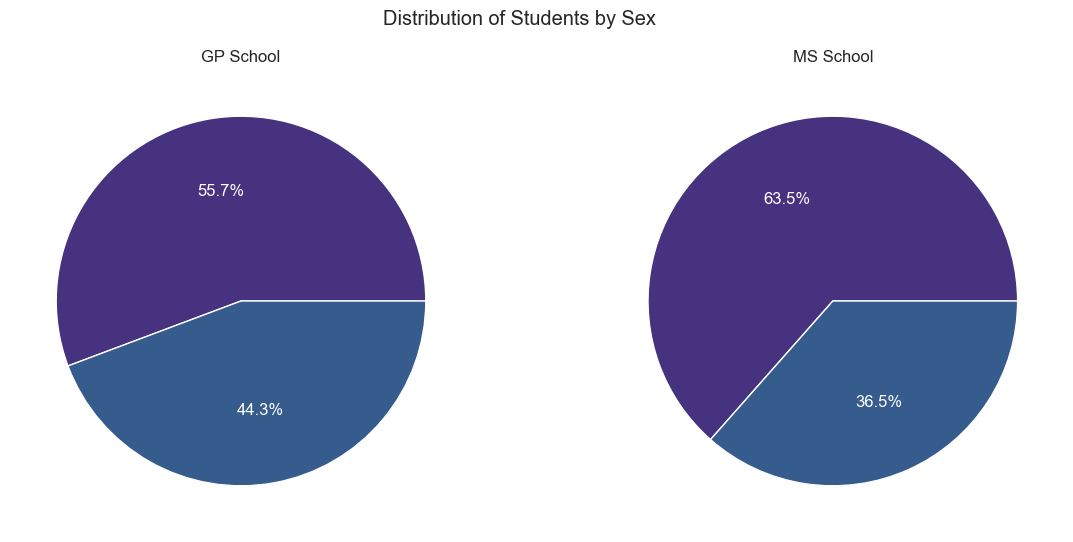

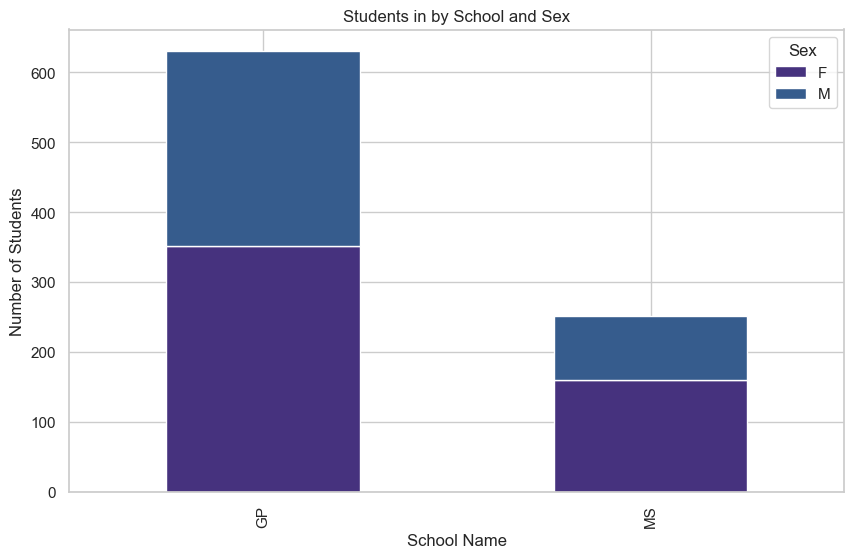

In [5]:
df = pd.read_csv("studentnum.csv")

# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bars=sns.barplot(x="school_name", y="num_students", hue="sex", data=df, palette="viridis")

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.1, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)

# Add titles and labels
plt.title('Number of Students by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Number of Students')

# Show the plot
plt.show()

#  Pie chart for each school showing the distribution of students in relationships by sex
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Students by Sex')

# GP school
df_gp = df[df['school_name'] == 'GP']
axes[0].pie(df_gp['num_students'], labels=df_gp['sex'], autopct='%1.1f%%', colors=sns.color_palette("viridis"),textprops=dict(color="white"))
axes[0].set_title('GP School')

# MS school
df_ms = df[df['school_name'] == 'MS']
axes[1].pie(df_ms['num_students'], labels=df_ms['sex'], autopct='%1.1f%%', colors=sns.color_palette("viridis"),textprops=dict(color="white"))
axes[1].set_title('MS School')

plt.show()

#  Stacked bar plot for each school showing the number of students in relationships by sex
df_pivot = df.pivot(index='school_name', columns='sex', values='num_students')
df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("viridis"))
plt.title('Students by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Number of Students')
plt.legend(title='Sex')
plt.show()


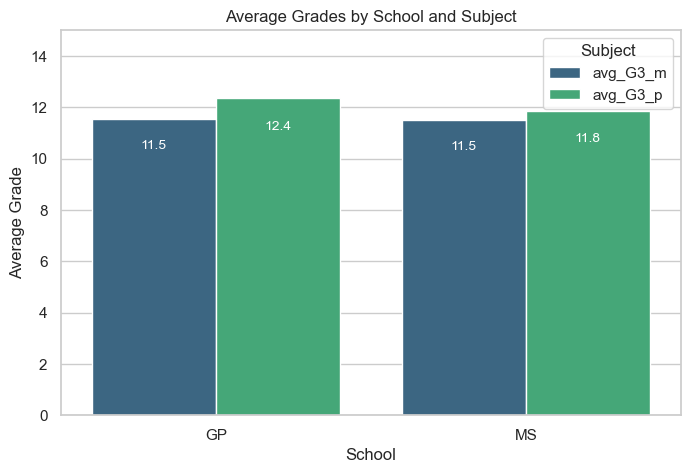

In [9]:
# Load the CSV file into a DataFrame
data = pd.read_csv("higher_performance.csv")

# Display the DataFrame (optional)
#print(data)

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars='school', value_vars=['avg_G3_m', 'avg_G3_p'], 
                         var_name='Subject', value_name='Average Grade')

# Create a bar chart
plt.figure(figsize=(8, 5))
bars= sns.barplot(x='school', y='Average Grade', hue='Subject', data=data_melted, palette='viridis')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.1, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)

# Add titles and labels
plt.title('Average Grades by School and Subject')
plt.xlabel('School')
plt.ylabel('Average Grade')
plt.legend(title='Subject')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, 15)  # Set y-axis limit for better visibility
plt.show()

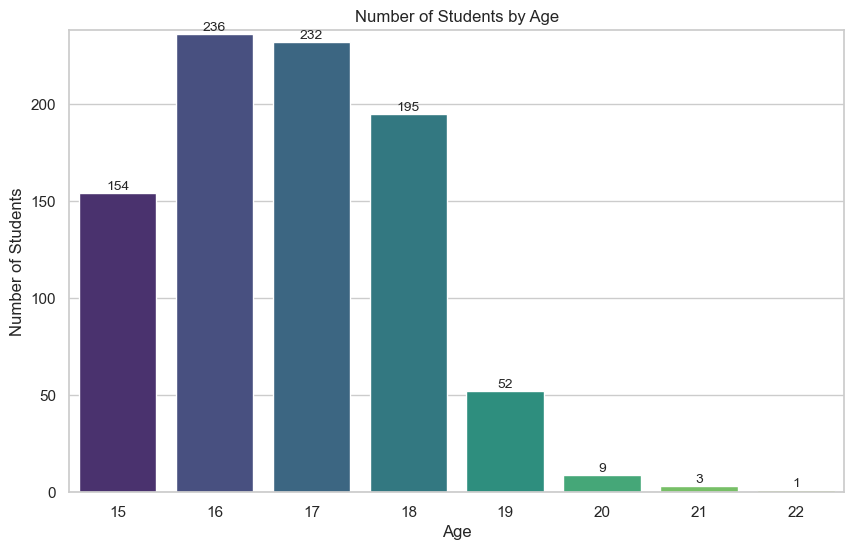

In [312]:
data = pd.read_csv("agevsnumber.csv")

df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='age', y='number_of_students', data=df, palette='viridis')

# Add values inside the bars
for bar in bars.patches:
    yval = int(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval}', 
             ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Number of Students by Age')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, max(df['number_of_students']) + 2)  # Set y-axis limit for better visibility
plt.show()

In [11]:
###Combining the 3 dataframes obtained for dating from SQL queries

from functools import reduce
data_date_avg = pd.read_csv("students_in_relationavggrade.csv")
data_date_yes= pd.read_csv(r"students_in_norelationyesavggrade.csv")
data_date_no= pd.read_csv(r"students_in_norelationavggrade.csv")

dfs = [data_date_avg,data_date_yes,data_date_no]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['school_name','sex'],
                                            how='outer'), dfs)
final_df[["school_name","sex","avg_math", "avg_math_dating","avg_math_nodate","avg_portuguese","avg_portuguese_dating","avg_portuguese_nodate"]]

,school_name,sex,avg_math,avg_math_dating,avg_math_nodate,avg_portuguese,avg_portuguese_dating,avg_portuguese_nodate
0,GP,F,12.1,11.3,12.5,12.6,12.4,12.8
1,GP,M,11.8,11.5,11.9,12.7,12.7,12.7
2,MS,F,11.8,12.7,11.0,11.9,11.8,12.0
3,MS,M,12.5,11.2,13.6,12.1,12.1,12.1


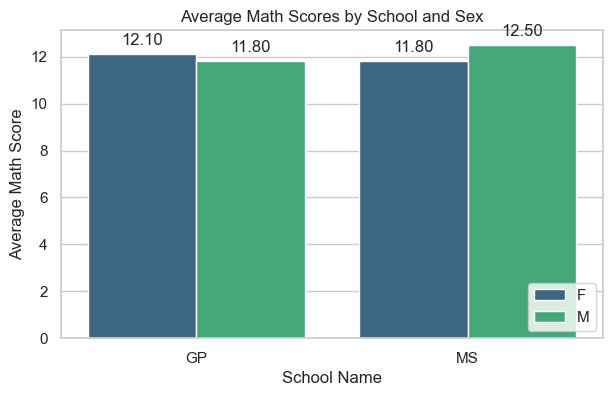

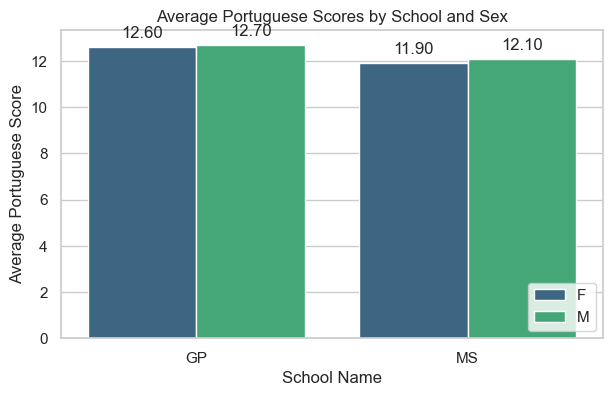

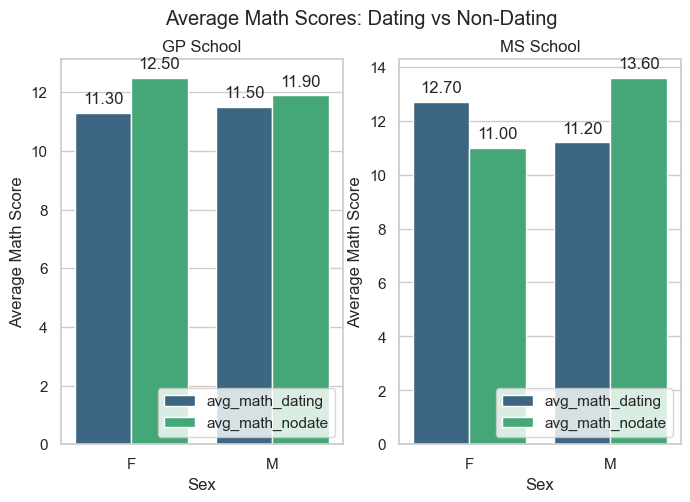

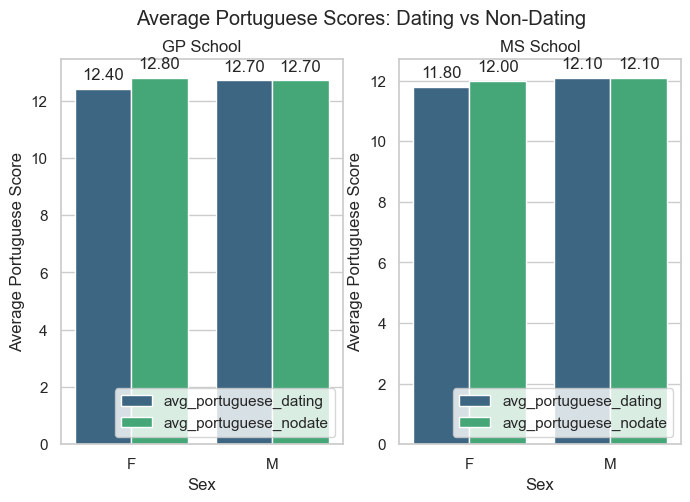

In [17]:
# Set the visual style
sns.set(style="whitegrid")

# Function to add labels to bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')

# 1. Bar plot for average math scores
plt.figure(figsize=(7, 4))
ax = sns.barplot(x="school_name", y="avg_math", hue="sex", data=final_df, palette="viridis")
plt.title('Average Math Scores by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Average Math Score')
add_labels(ax)
plt.legend(loc='lower right')
plt.show()

# 2. Bar plot for average Portuguese scores
plt.figure(figsize=(7, 4))
ax = sns.barplot(x="school_name", y="avg_portuguese", hue="sex", data=final_df, palette="viridis")
plt.title('Average Portuguese Scores by School and Sex')
plt.xlabel('School Name')
plt.ylabel('Average Portuguese Score')
add_labels(ax)
plt.legend(loc='lower right')
plt.show()

# 3. Grouped bar plot for dating vs non-dating average math scores by school and sex
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Average Math Scores: Dating vs Non-Dating')

# GP school
df_gp = final_df[final_df['school_name'] == 'GP']
df_gp_math = df_gp.melt(id_vars=['school_name', 'sex'], value_vars=['avg_math_dating', 'avg_math_nodate'], var_name='Status', value_name='Score')
ax = sns.barplot(x="sex", y="Score", hue="Status", data=df_gp_math, ax=axes[0], palette="viridis")
axes[0].set_title('GP School')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Math Score')
add_labels(ax)
axes[0].legend(loc='lower right')

# MS school
df_ms = final_df[final_df['school_name'] == 'MS']
df_ms_math = df_ms.melt(id_vars=['school_name', 'sex'], value_vars=['avg_math_dating', 'avg_math_nodate'], var_name='Status', value_name='Score')
ax = sns.barplot(x="sex", y="Score", hue="Status", data=df_ms_math, ax=axes[1], palette="viridis")
axes[1].set_title('MS School')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Math Score')
add_labels(ax)
axes[1].legend(loc='lower right')

plt.show()

# 4. Grouped bar plot for dating vs non-dating average Portuguese scores by school and sex
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
fig.suptitle('Average Portuguese Scores: Dating vs Non-Dating')

# GP school
df_gp_portuguese = df_gp.melt(id_vars=['school_name', 'sex'], value_vars=['avg_portuguese_dating', 'avg_portuguese_nodate'], var_name='Status', value_name='Score')
ax = sns.barplot(x="sex", y="Score", hue="Status", data=df_gp_portuguese, ax=axes[0], palette="viridis")
axes[0].set_title('GP School')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Average Portuguese Score')
add_labels(ax)
axes[0].legend(loc='lower right')

# MS school
df_ms_portuguese = df_ms.melt(id_vars=['school_name', 'sex'], value_vars=['avg_portuguese_dating', 'avg_portuguese_nodate'], var_name='Status', value_name='Score')
ax = sns.barplot(x="sex", y="Score", hue="Status", data=df_ms_portuguese, ax=axes[1], palette="viridis")
axes[1].set_title('MS School')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Average Portuguese Score')
add_labels(ax)
axes[1].legend(loc='lower right')

plt.show()


In [14]:
data = pd.read_csv(r"fatherjobvsavggrade.csv")
data

,father_job,avg_final_grade_math,avg_final_grade_portuguese
0,teacher,13.3,12.9
1,other,11.9,12.5
2,services,11.7,12.4
3,health,12.7,12.7
4,at_home,10.9,11.9


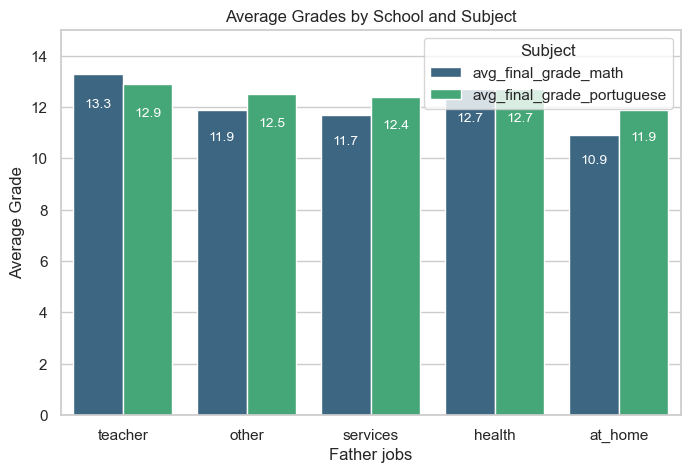

In [15]:
# Load the CSV file into a DataFrame
data = pd.read_csv(r"fatherjobvsavggrade.csv")

# Display the DataFrame (optional)
#print(data)

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars='father_job', value_vars=['avg_final_grade_math', 'avg_final_grade_portuguese'], 
                         var_name='Subject', value_name='Average Grade')

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = sns.barplot(x='father_job', y='Average Grade', hue='Subject', data=data_melted, palette='viridis')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.1, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)

# Add titles and labels
plt.title('Average Grades by School and Subject')
plt.xlabel('Father jobs')
plt.ylabel('Average Grade')
plt.legend(title='Subject')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, 15)  # Set y-axis limit for better visibility
plt.show()

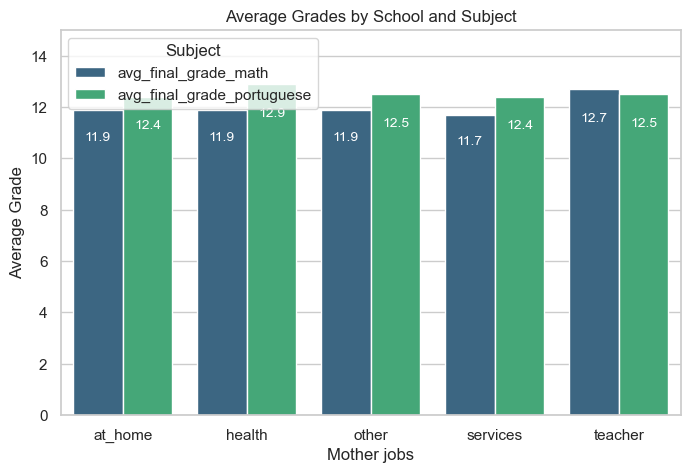

In [18]:
# Load the CSV file into a DataFrame
data = pd.read_csv(r"motherjobvsavggrade.csv")

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars='mother_job', value_vars=['avg_final_grade_math', 'avg_final_grade_portuguese'], 
                         var_name='Subject', value_name='Average Grade')

# Create a bar chart
plt.figure(figsize=(8, 5))
bars=sns.barplot(x='mother_job', y='Average Grade', hue='Subject', data=data_melted, palette='viridis')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.1, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)


# Add titles and labels
plt.title('Average Grades by School and Subject')
plt.xlabel('Mother jobs')
plt.ylabel('Average Grade')
plt.legend(title='Subject')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, 15)  # Set y-axis limit for better visibility
plt.show()

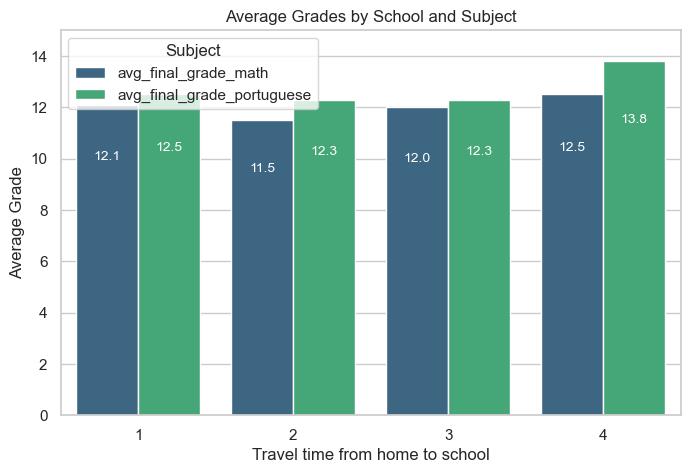

In [19]:
# Load the CSV file into a DataFrame
data = pd.read_csv(r"traveltimevsgrades.csv")

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars='traveltime', value_vars=['avg_final_grade_math', 'avg_final_grade_portuguese'], 
                         var_name='Subject', value_name='Average Grade')

# Create a bar chart
plt.figure(figsize=(8, 5))
bars=sns.barplot(x='traveltime', y='Average Grade', hue='Subject', data=data_melted, palette='viridis')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.2, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)


# Add titles and labels
plt.title('Average Grades by School and Subject')
plt.xlabel('Travel time from home to school')
plt.ylabel('Average Grade')
#plt.xlabel()
plt.legend(title='Subject')
new_labels = ["< 15m","15m-30m", "30m-1h" , ">1h"]
#plt.xticks(ticks=range(len(traveltime)), labels=new_labels)
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, 15)  # Set y-axis limit for better visibility
plt.show()

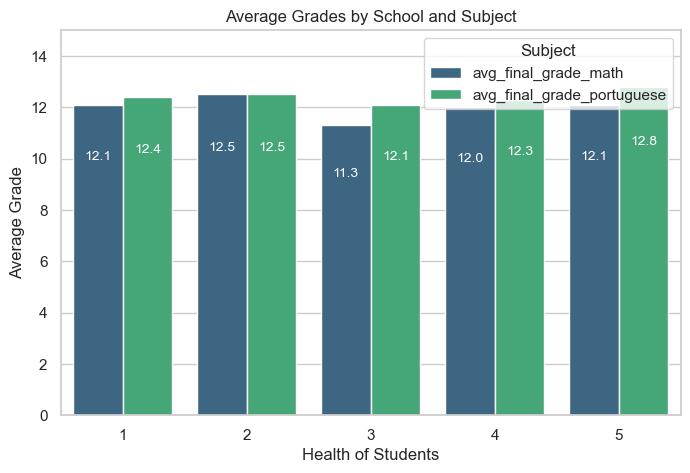

In [330]:
# Load the CSV file into a DataFrame
data = pd.read_csv(r"healthvsgrade.csv")

# Display the DataFrame (optional)
#print(data)

# Set the plot style
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting with seaborn
data_melted = data.melt(id_vars='health', value_vars=['avg_final_grade_math', 'avg_final_grade_portuguese'], 
                         var_name='Subject', value_name='Average Grade')

# Create a bar chart
plt.figure(figsize=(8, 5))
bars=sns.barplot(x='health', y='Average Grade', hue='Subject', data=data_melted, palette='viridis')

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval / 1.2, f'{yval:.1f}', 
             ha='center', va='center', color='white', fontsize=10)


# Add titles and labels
plt.title('Average Grades by School and Subject')
plt.xlabel('Health of Students')
plt.ylabel('Average Grade')
#plt.xlabel()
plt.legend(title='Subject')
new_labels = ["< 15m","15m-30m", "30m-1h" , ">1h"]
#plt.xticks(ticks=range(len(traveltime)), labels=new_labels)
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, 15)  # Set y-axis limit for better visibility
plt.show()

In [264]:
data = pd.read_csv(r"AGEVSNUMBER.csv")
data

,age,number_of_students
0,15,154
1,16,236
2,17,232
3,18,195
4,19,52
5,20,9
6,21,3
7,22,1


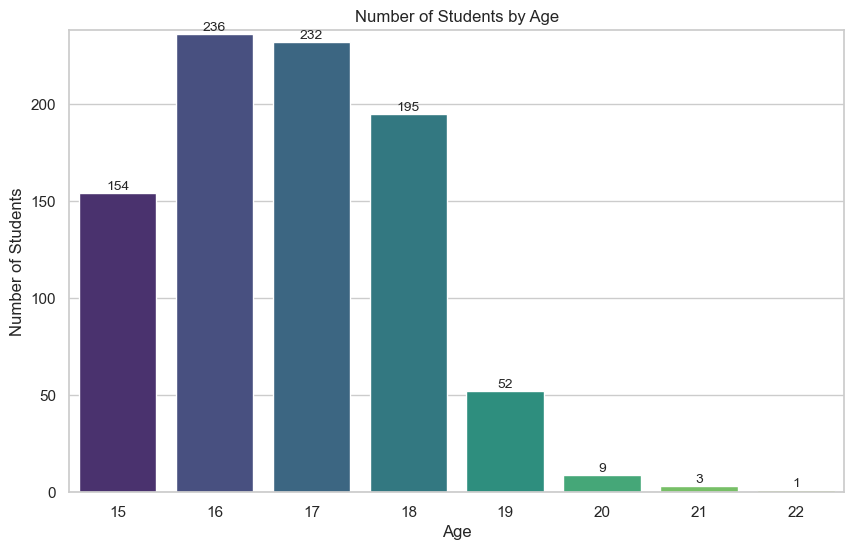

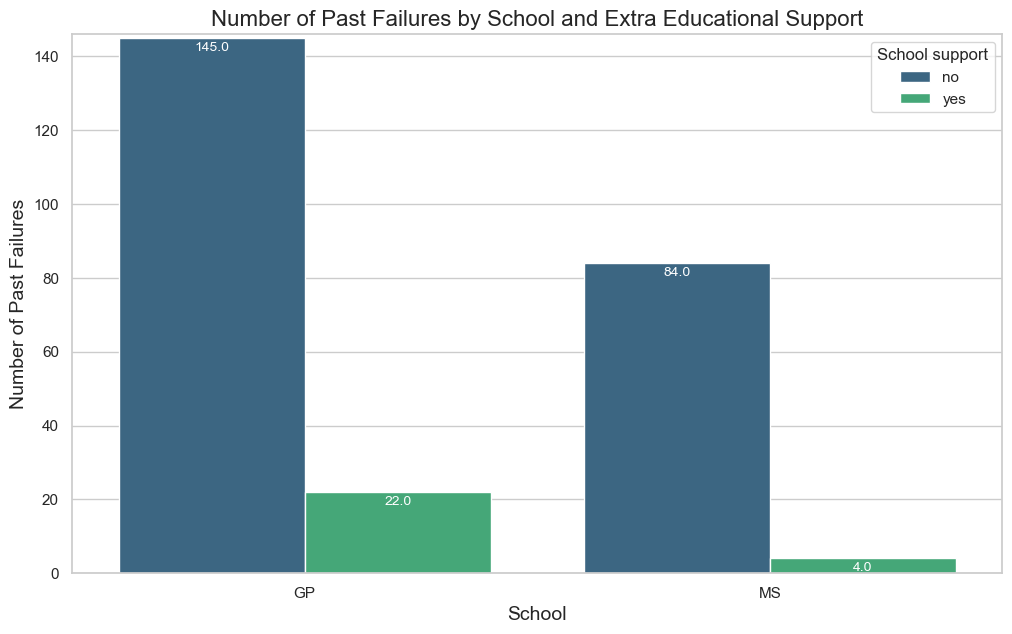

In [277]:
data = pd.read_csv(r"C:\Users\shyam\Desktop\IRONHACK\PROJECT WEEK 4\student\schoolsupvsfailure.csv")

# Create DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 7))
bars = sns.barplot(x='school', y='failed_in_past', hue='schoolsup', data=df, palette='viridis', dodge=True)

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{yval:.1f}', 
                  xy=(bar.get_x() + bar.get_width() / 2, yval), 
                  xytext=(0, -7),  # 5 points vertical offset
                  textcoords='offset points',
                  ha='center', va='center', color='white', fontsize=10)

# Add titles and labels
plt.title('Number of Past Failures by School and Extra Educational Support', fontsize=16)
plt.xlabel('School', fontsize=14)
plt.ylabel('Number of Past Failures', fontsize=14)
plt.legend(title='School support')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, df['failed_in_past'].max() + 1)  # Set y-axis limit for better visibility
plt.show()



In [20]:
data = pd.read_csv(r"agevsalcohol.csv")
data

,school,age,average_alcohol_consumption_days
0,GP,15,1.4
1,MS,15,1.4
2,GP,16,1.4
3,MS,16,1.4
4,GP,17,1.5
5,MS,17,1.7
6,GP,18,1.5
7,MS,18,1.7
8,GP,19,1.6
9,MS,19,1.8


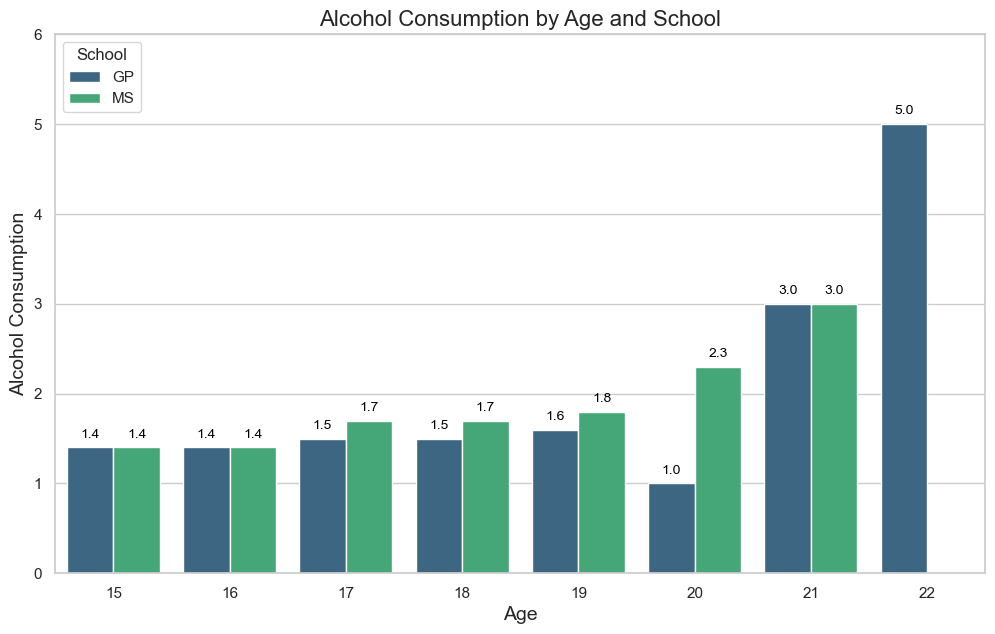

In [257]:
data = pd.read_csv(r"C:\Users\shyam\Desktop\IRONHACK\PROJECT WEEK 4\student\agevsalcohol.csv")

# Create DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 7))
bars = sns.barplot(x='age', y='average_alcohol_consumption_days', hue='school', data=df, palette='viridis', dodge=True)

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.annotate(f'{yval:.1f}', 
                  xy=(bar.get_x() + bar.get_width() / 2, yval), 
                  xytext=(0, 5),  # 5 points vertical offset
                  textcoords='offset points',
                  ha='center', va='bottom', color='black', fontsize=10)

# Add titles and labels
plt.title('Alcohol Consumption by Age and School', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Alcohol Consumption', fontsize=14)
plt.legend(title='School')
plt.xticks(rotation=0)  # Rotate x labels if needed
plt.ylim(0, df['average_alcohol_consumption_days'].max() + 1)  # Set y-axis limit for better visibility
plt.show()
